## Classification model

* 사용한 데이터셋: 암유래물질 + 면역 + 암미세환경 모두 포함된 데이터셋에서, 파생변수제거 후 암미세환경에 검출코드 적용한 데이터셋에서 제3사분위수 이하 평균값으로 결측치 채움
* 각 모델별 성능은 교차검증(5 splits) 후의 값이며, votingClassifier에서 voting을 hard로 적용했을 경우 Ensemble 모델의 성능이 이전 개별 모델보다 높게 나옴

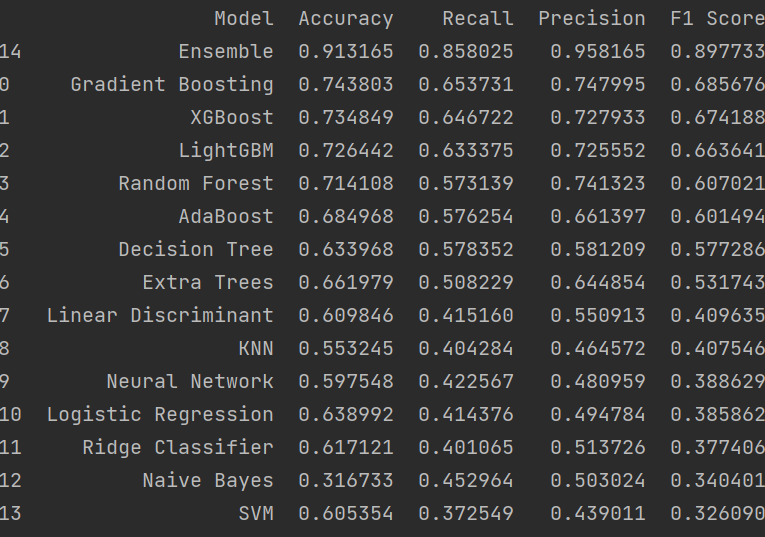

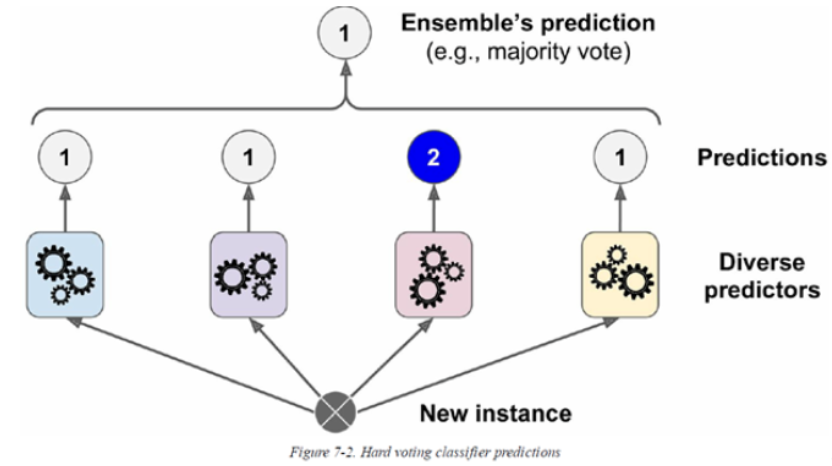

* Voting은 말 그대로 "서로 다른 알고리즘이 도출해 낸 결과물에 대해 투표하는 방식을 통해 최종 결과를 선택"하는 방식이다.
* 이 중 Hard Voting은 위의 그림을 예로 들면, 4개의 모델 중 3개의 모델이 1이라고 예측한 경우에 앙상블의 예측값은 1이 되는. 즉 classifier들의 결과들을 집계하여 가장 많은 표를 얻은 클래스를 최종 예측값으로 하는 방식이다.
* [VotingClassifier 블로그 링크](https://steadiness-193.tistory.com/289)

**작성한 코드의 일부**

In [ ]:
ensemble_models = [(model_name, model) for model_name, model in models]
ensemble_model = VotingClassifier(estimators=ensemble_models, voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble, average='macro')
ensemble_precision = precision_score(y_test, y_pred_ensemble, average='macro')
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average='macro')

**Next Step**

* 성능 향상의 과정이 합당하지 않을 가능성이 있으니 Ensemble 모델의 성능을 세부적으로 살펴보고 분석할 필요가 있음.
* 해석이 필요함.